<a href="https://colab.research.google.com/github/manjotmb20/Transfer-Learning/blob/master/singleobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
from darkflow.net.build import TFNet

W0618 04:53:28.856350 140478924302208 deprecation_wrapper.py:119] From /content/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0618 04:53:28.857893 140478924302208 deprecation_wrapper.py:119] From /content/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0618 04:53:28.860038 140478924302208 deprecation_wrapper.py:119] From /content/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0618 04:53:28.861539 140478924302208 deprecation_wrapper.py:119] From /content/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0618 04:53:28.862539 140478924302208 deprecation_wrapper.py:119] From /content/darkflow/net/build.py:19: The name tf.train.MomentumOptimizer 

In [5]:
pip install -e .

Obtaining file:///content
  Running setup.py develop for darkflow


In [0]:
import os
import zipfile

In [0]:
zip_ref=zipfile.ZipFile('darkflow-master.zip','r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [72]:
options={
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.5,
    'gpu':1.0
    }

tfnet=TFNet(options)

/content/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.014717340469360352s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [73]:
img=cv2.imread('jha.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result=tfnet.return_predict(img)
img.shape
result

[{'bottomright': {'x': 641, 'y': 1101},
  'confidence': 0.551397,
  'label': 'person',
  'topleft': {'x': 361, 'y': 698}},
 {'bottomright': {'x': 1622, 'y': 2303},
  'confidence': 0.70762575,
  'label': 'person',
  'topleft': {'x': 651, 'y': 377}},
 {'bottomright': {'x': 1727, 'y': 1532},
  'confidence': 0.6443841,
  'label': 'keyboard',
  'topleft': {'x': 1480, 'y': 1199}}]

In [77]:
result[1]

{'bottomright': {'x': 1622, 'y': 2303},
 'confidence': 0.70762575,
 'label': 'person',
 'topleft': {'x': 651, 'y': 377}}

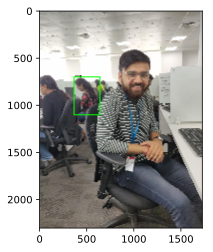

In [82]:
tl=(result[0]['topleft']['x'],result[0]['topleft']['y'])
tl
br=(result[0]['bottomright']['x'],result[0]['bottomright']['y'])
br
label=result[0]['label']
img=cv2.rectangle(img,tl,br,(0,255,0),7)
img=cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()

In [68]:
br=(result[0]['bottomright']['x'],result[0]['bottomright']['y'])
br

IndexError: ignored

In [63]:
label=result[0]['label']
label

'person'

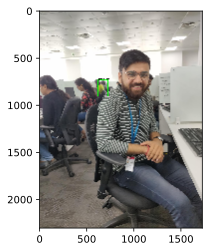

In [64]:
img=cv2.rectangle(img,tl,br,(0,255,0),7)
img=cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()